<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>  </center></font></h1>
<h2><font color='0B5345'> <center>Practica 6: Diseño de filtros digitales </center></font></h2>
<font  face="Courier New" size="3">
<p1><center> Catalina Guerra - Juan Esteban Campillo - Angie Tovar</center></p1>

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

##**Cargar librerias**

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import welch, butter, filtfilt
from scipy.signal import iirnotch

##**Diseñe un filtro**

#### **1. Creación de la señal biológica**

Text(0.5, 1.0, 'Señal Biológica y_e')

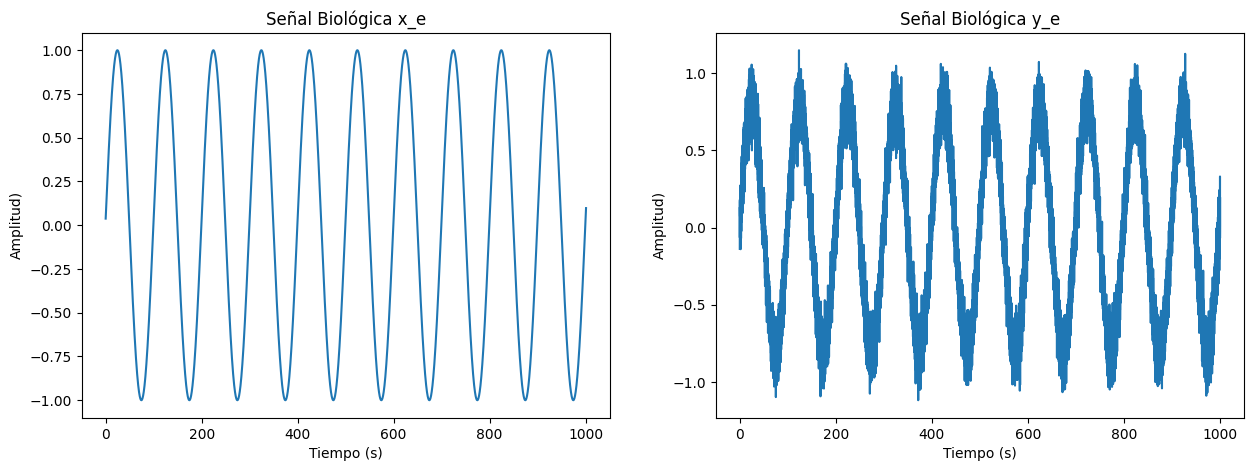

In [ ]:
F0 = 0.01
Fs =25
alfa = 0.8
D = 15
var = 0.01
media = 0
n = np.arange(0,1001,1/Fs)
x_e = np.sin(2*np.pi*F0*(n+15/Fs))
w = np.random.normal(media,np.sqrt(var),len(n))
y_e = alfa*x_e+w

plt.figure(figsize=(15,5));
plt.subplot(121)
plt.plot(n,x_e,label='x_e')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud)')
plt.title('Señal Biológica x_e')

plt.subplot(122)
plt.plot(n, y_e)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud)')
plt.title('Señal Biológica y_e')

 #### **2. Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒 (𝑛), con una frecuencia de corte de 1.25 muestras/s y orden 30.**

In [ ]:
order = 30
nyquist = Fs/2
wn = 1.25/nyquist
lowpass = signal.firwin(order +1 ,wn,pass_zero="lowpass",window="hamming")

#### **3. ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s**


In [ ]:
highpass = signal.firwin(order + 1,wn,pass_zero="highpass",window="hamming")
wn1 = 7.5/nyquist
bandpass = signal.firwin(order + 1,[wn,wn1],pass_zero="bandpass",window="hamming")

- Para el filtro pasa altas, al argumento pass_zero se asigna el valor de "highpass".
- Para el filtro pasa banda, al argumento pass_zero se le asigna "bandpass" y se agregra un array para definir las frecuencias de corte, en este caso [1.25,7.5].

A continuaciom, se muestran los Diagramas de Bode de cada filtro (pasa-bajas, pasa-altas y pasa-banda)

In [ ]:
def mfreqz(b,a,order,nyq_rate = 1):
    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));


    plt.figure(figsize=(8,10));
    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();

    #plt.xlim((40,60))

    plt.grid(True);

    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)

    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()



#### **Filtro pasa - baja FIR**

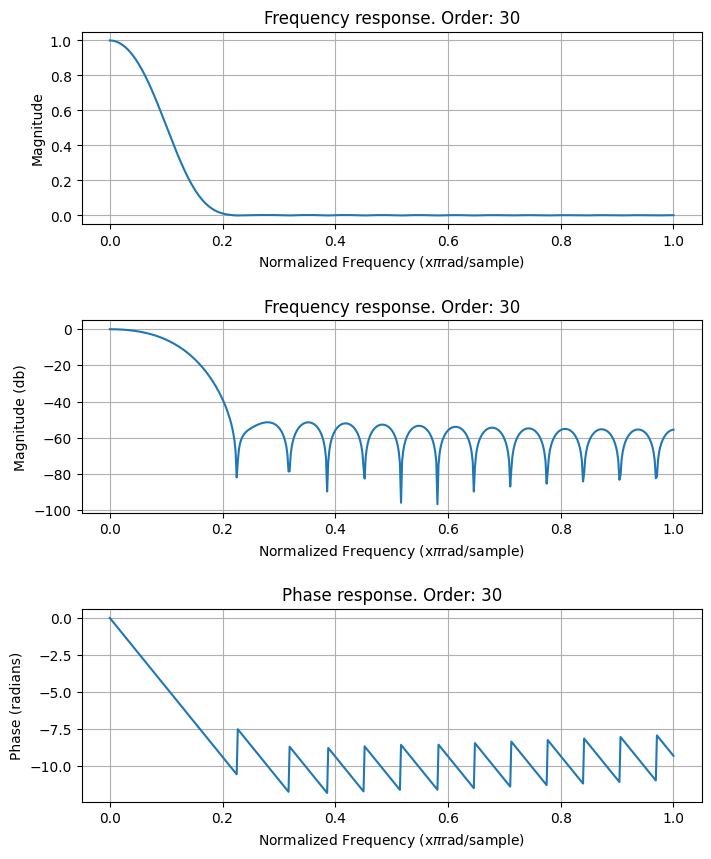

In [ ]:
mfreqz(b=lowpass,a=1,order=order)

#### **Filtro pasa - alta FIR**

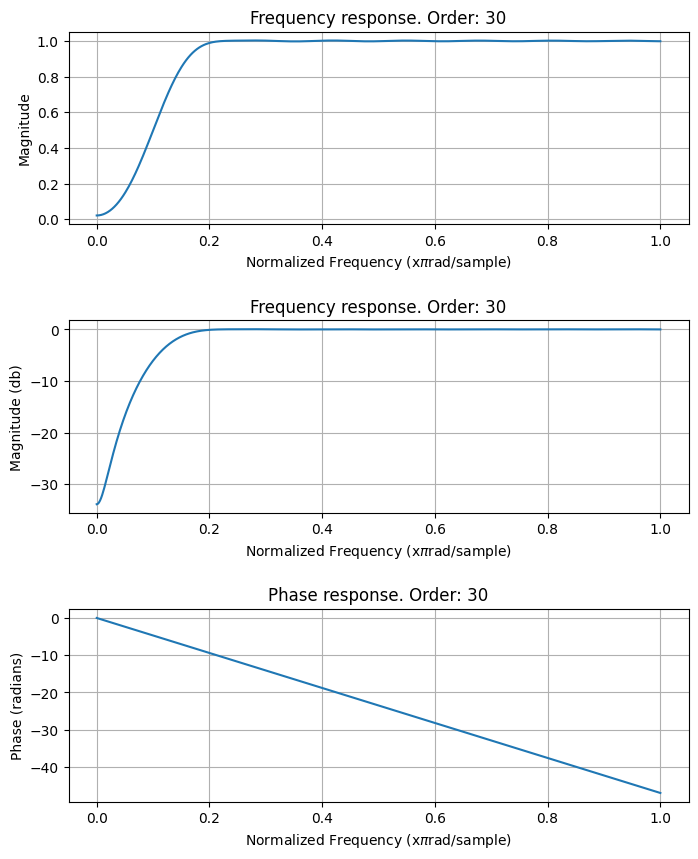

In [ ]:
mfreqz(b=highpass,a=1,order=order)

#### **Filtro pasa - banda FIR**

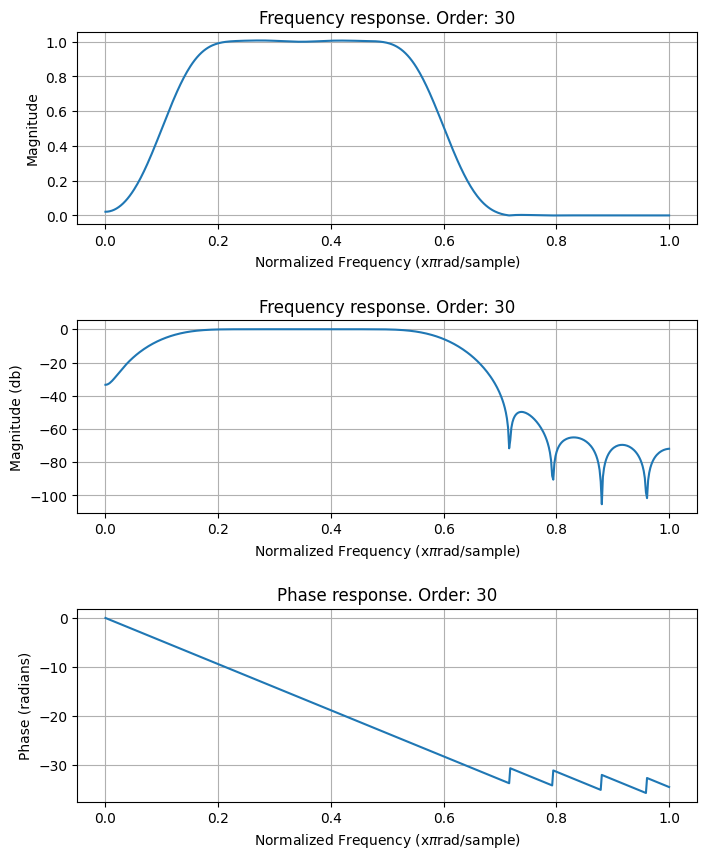

In [ ]:
mfreqz(b=bandpass,a=1,order=order)

#### **4.  Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.**

In [ ]:
n_b,d_b = signal.iirfilter(order + 1,wn,btype="lowpass")
n_a, d_a = signal.iirfilter(order + 1,wn,btype="highpass")
wn1 = 7.5/nyquist
n_p, d_p = signal.iirfilter(order + 1,[wn,wn1],btype="bandpass")

- Para el filtro IIR, pass_zero cambia por btype y no es necesario poner la ventana

#### **Filtro pasa - baja IIR**

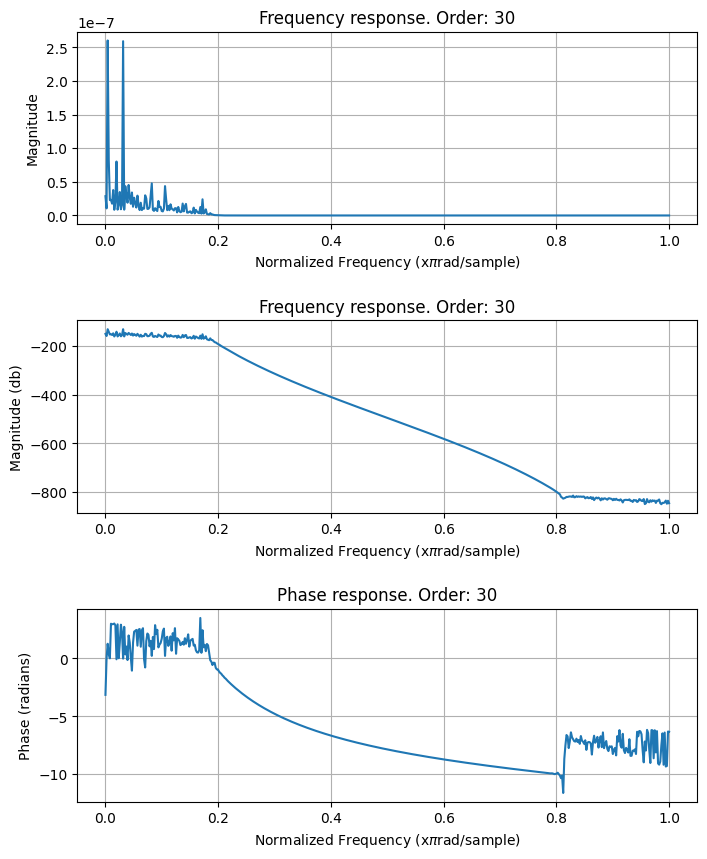

In [ ]:
mfreqz(b=n_b,a=d_b,order=order)

#### **Filtro pasa - alta IIR**

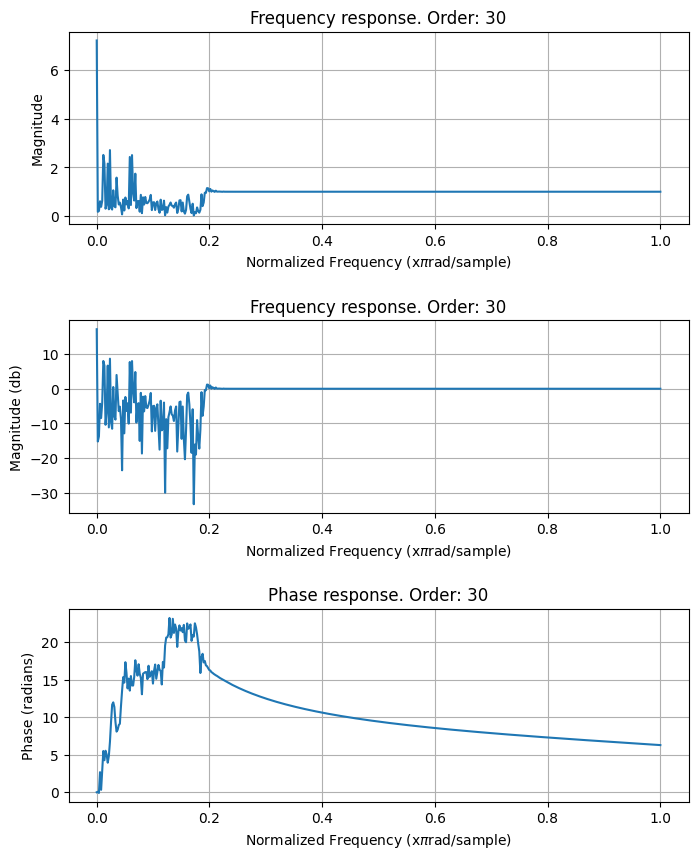

In [ ]:
mfreqz(b=n_a,a=d_a,order=order)

#### **Filtro pasa - banda IIR**

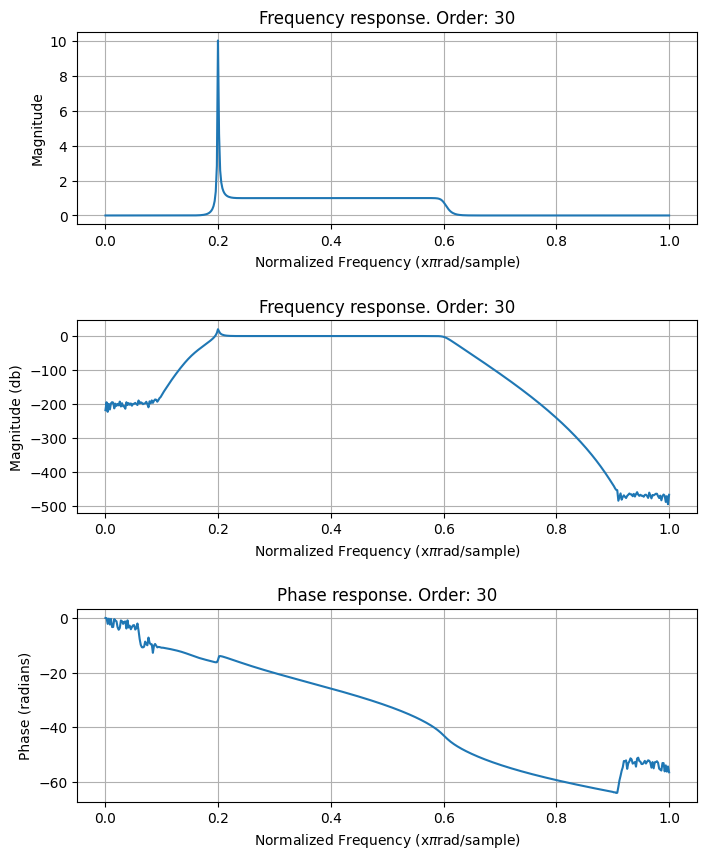

In [ ]:
mfreqz(b=n_p,a=d_p,order=order)

#### **Comparación entre FIR e IIR**

Los filtros IIR son más inestables que los FIR debido a su realimentación, lo que puede llevar a oscilaciones o divergencias. Además, los FIR pueden diseñarse para tener una fase lineal, lo cual preserva la forma de la señal, algo que no es característico en los filtros IIR, los cuales suelen tener fases no lineales y, por tanto, una mayor tendencia a distorsionar señales sensibles.


## **Filtrado**

#### **1. Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia?¿Es adecuado el orden del filtro usado? Analice.**

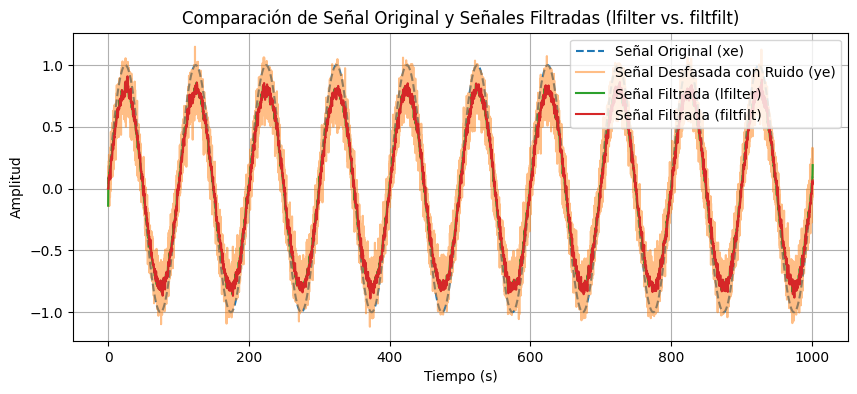

In [ ]:
y_f = signal.filtfilt(lowpass,1,y_e)
y_I = signal.lfilter(lowpass,1,y_e)

plt.figure(figsize=(10, 4))
plt.plot(n, x_e, label='Señal Original (xe)', linestyle='--', color='C0')
plt.plot(n, y_e, label='Señal Desfasada con Ruido (ye)', color='C1', alpha=0.5)
plt.plot(n, y_f, label='Señal Filtrada (lfilter)', color='C2')
plt.plot(n, y_I, label='Señal Filtrada (filtfilt)', color='C3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Comparación de Señal Original y Señales Filtradas (lfilter vs. filtfilt)')
plt.legend()
plt.grid(True)
plt.show()

- En este tipo de filtros, que se conocen como FIR, solo se utiliza el numerador en su función de transferencia, ya que no cuentan con realimentación. Esto significa que el denominador se iguala a 1, eliminando la dependencia de las salidas anteriores en el cálculo de la salida actual.[1]

- El numerador en un filtro FIR representa los coeficientes que definen la respuesta, estos coeficientes determinan la forma en que el filtro responde a la señal de entrada [1].

- Para el uso de las funciones filtfilt y lfilter se ingresan los mismos argumentos que corresponden al numerador, que es este caso es lowpass, el denominador que es 1 y la señal(y_e).  

- El orden del filtro usado (30) no es adecuado ya que le esta generando ondulaciones no deseadas a la señal de salida,como se evidencia en el diagrama de bode, analizando experimentalmente se ve lineal cuando tiene un orden de 4





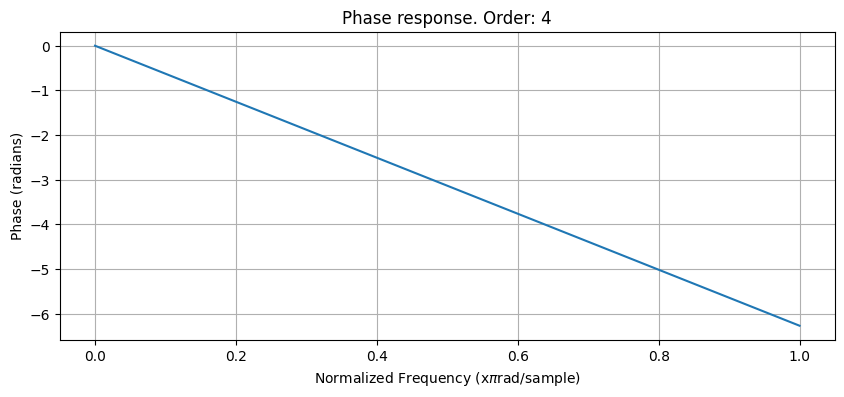

In [ ]:
order = 4
nyquist = Fs/2
wn = 1.25/nyquist
lowpass = signal.firwin(order +1 ,wn,pass_zero="lowpass",window="hamming")

def mfreqz(b,a,order,nyq_rate = 1):
    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));
    plt.figure(figsize=(10, 4))
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

mfreqz(b=lowpass,a=1,order=order)

- Haciendo un analisis, usando firwin no se evidencia una diferencia de fase entre filtfilt y lfilter, por lo tanto no se aprecia una falta de coincidencia, entonces se procede a usar butter para ver la diferencia.

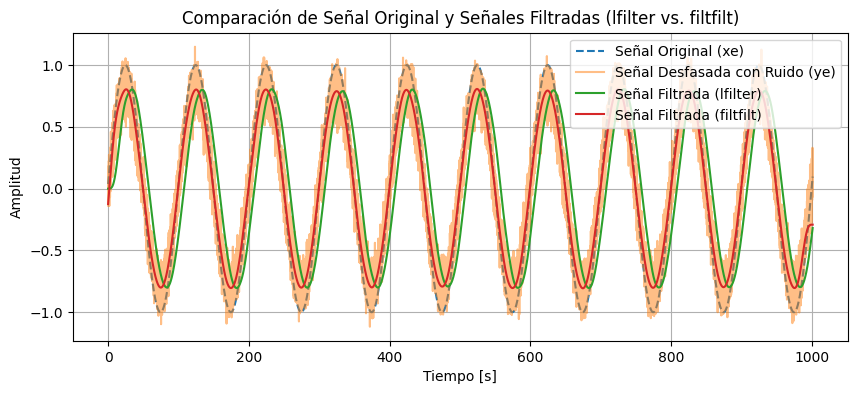

In [ ]:
orden = 4
fc = 0.05
b, a = butter(orden, fc / (Fs / 2), btype='low')

ye_lfilter = signal.lfilter(b, a, y_e)
ye_filtfilt = signal.filtfilt(b, a, y_e)

plt.figure(figsize=(10, 4))
plt.plot(n, x_e, label='Señal Original (xe)', linestyle='--', color='C0')
plt.plot(n, y_e, label='Señal Desfasada con Ruido (ye)', color='C1', alpha=0.5)
plt.plot(n, ye_lfilter, label='Señal Filtrada (lfilter)', color='C2')
plt.plot(n, ye_filtfilt, label='Señal Filtrada (filtfilt)', color='C3')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Comparación de Señal Original y Señales Filtradas (lfilter vs. filtfilt)')
plt.legend()
plt.grid(True)
plt.show()

#### **2. Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice**.

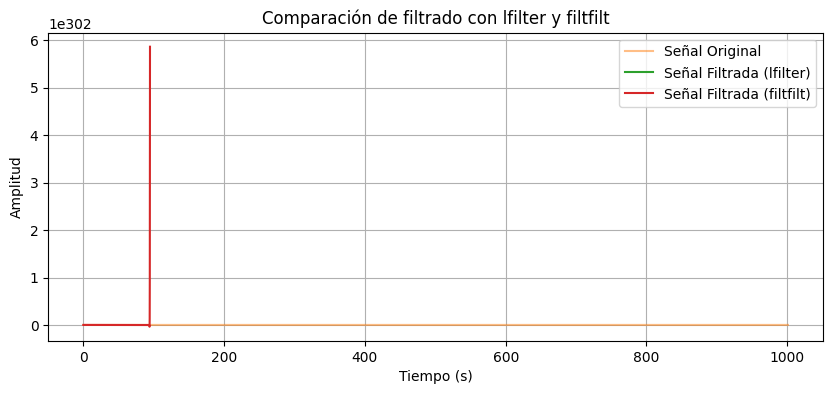

In [ ]:
y_f = signal.filtfilt(n_b,d_b,y_e)
y_I = signal.lfilter(n_b,d_b,y_e)


plt.figure(figsize=(10, 4))
plt.plot(n, y_e, label='Señal Original', color='C1', alpha=0.5)
plt.plot(n, y_f, label='Señal Filtrada (lfilter)', color='C2')
plt.plot(n, y_I, label='Señal Filtrada (filtfilt)', color='C3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Comparación de filtrado con lfilter y filtfilt')
plt.legend()
plt.grid(True)
plt.show()

*   En los filtros IIR se hace uso del numerador y denominador porque existe realimentación, Esta realimentación introduce una dependencia de las salidas anteriores en el cálculo de las salidas actuales, permitiendo que el filtro tenga una respuesta infinita en el tiempo. [2]

*   Si es necesario cambiarle el orden al filtro, con el orden de 30 la señal del filtro IIR se desestabiliza, por lo que se debe cambiar a un orden menor, en este caso, se cambió a 10 y se puede observar en la siguiente gráfica.



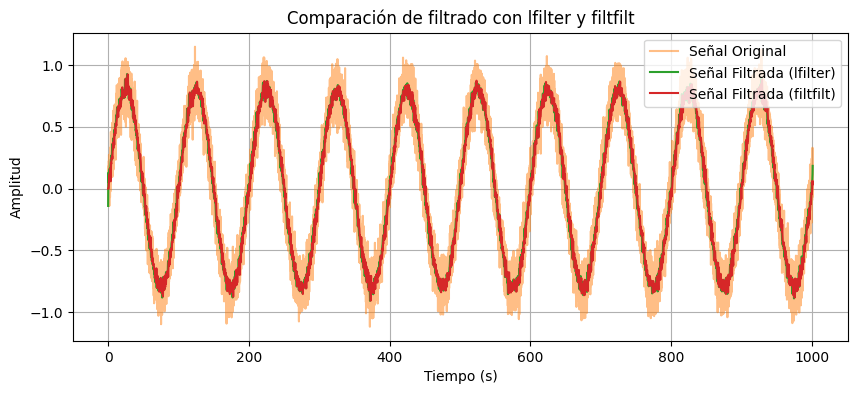

In [ ]:
n_b,d_b = signal.iirfilter(10 + 1,wn,btype="lowpass")
y_f = signal.filtfilt(n_b,d_b,y_e)
y_I = signal.lfilter(n_b,d_b,y_e)


plt.figure(figsize=(10, 4))
plt.plot(n, y_e, label='Señal Original', color='C1', alpha=0.5)
plt.plot(n, y_f, label='Señal Filtrada (lfilter)', color='C2')
plt.plot(n, y_I, label='Señal Filtrada (filtfilt)', color='C3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Comparación de filtrado con lfilter y filtfilt')
plt.legend()
plt.grid(True)
plt.show()

## **Aplicación**

#### **1. Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice**

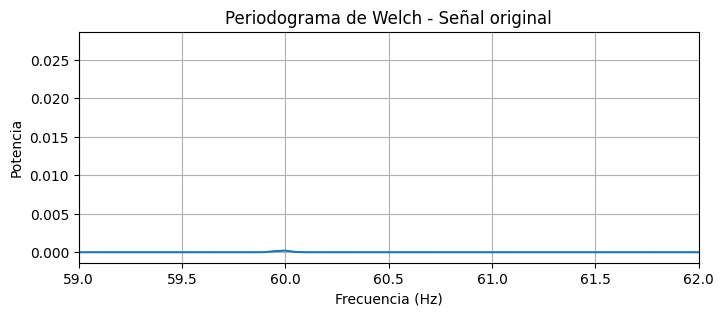

In [185]:
mat_data = np.loadtxt('senal_filtros.txt')
canal_1 =mat_data[:,0]
fs = 500
ancho_ventana = 10000
solapamiento = int(ancho_ventana /2)
window = np.hanning(ancho_ventana)

f, Pxx = welch(canal_1, fs, window=window, nperseg=ancho_ventana, noverlap=solapamiento)

plt.figure(figsize=(8,3))
plt.plot(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.xlim([59, 62])
plt.title('Periodograma de Welch - Señal original')
plt.grid(True)

- Si, en la frecuencia de 60Hz se evidencia muy levente presencia de ruido eléctrico







#### **2. Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice**

Debido que la señal ya se encuentra filtrada, se aplicará un filtro Notch para eliminar la frecuencia del ruido eléctrico.

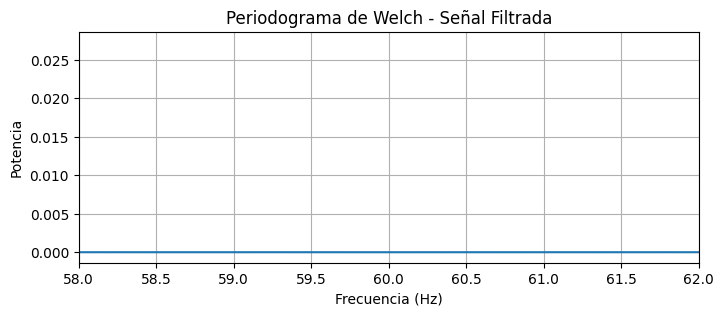

In [186]:
freq_notch = 60
quality_factor = 100

b, a = iirnotch(freq_notch, quality_factor, fs)
canal_1_filtrado = filtfilt(b, a, canal_1)

ancho_ventana = 10000
solapamiento = int(ancho_ventana / 2)
window = np.hanning(ancho_ventana)
f, Pxx_filtrado = welch(canal_1_filtrado, fs, window=window, nperseg=ancho_ventana, noverlap=solapamiento)

plt.figure(figsize=(8, 3))
plt.plot(f, Pxx_filtrado)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.xlim([58, 62])
plt.title('Periodograma de Welch - Señal Filtrada')
plt.grid(True)
plt.show()


Al realizar el filtro, se evidencia que en la frecuencia de 60 Hz, ya no se presenta ningun ruido.

#### **3. Grafique un segmento de las señales antes y después de filtrar, analice los cambios**

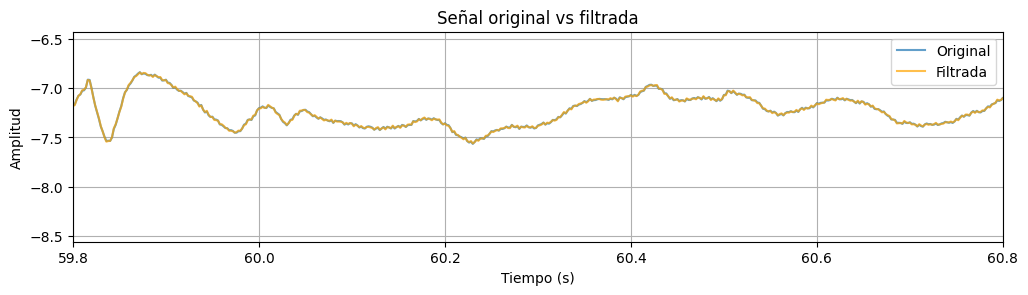

In [192]:
fs = 500
tiempo = np.arange(len(canal_1)) / fs
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo, canal_1, label='Original', alpha=0.7)
plt.plot(tiempo, canal_1_filtrado, label='Filtrada', color='orange', alpha=0.7)
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal original vs filtrada')
plt.xlim([59.8, 60.8])
plt.grid(True)

Dado que la señal ya se encontraba filtrada, no se evidencian cambios significativos en el uso del filtro notch, al momento de analizarlo en el tiempo.

## **CONCLUSIONES**

1. Se logró comprender y aplicar el proceso de diseño de filtros digitales en Python, adquiriendo habilidades para seleccionar tipos de filtros adecuados según los requisitos de la señal (como filtros IIR y FIR, que son útiles en diferentes contextos dependiendo de la estabilidad y la precisión deseadas).

2. Al aplicar filtros en Python, se demostró la utilidad de filtfilt y lfilter en la implementación de filtrado en tiempo real y en la eliminación de retardo de fase, observando cómo estas funciones afectan los resultados gráficos y la integridad de la señal.

## **REFERENCIAS**

[1]	«filtros.pdf». Accedido: 29 de octubre de 2024. [En línea]. Disponible en: https://www.pablocetta.com/pdfs/publicaciones/filtros.pdf


[2]	«Modelado de filtros IIR usando un algoritmo inspirado en el electromagnetismo». Accedido: 30 de octubre de 2024. [En línea]. Disponible en: https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1405-77432013000100012

